In [1]:
#Load python libraries

import pandas as pd
import numpy as np
from ase.io.trajectory import Trajectory
import matplotlib.pyplot as plt
from pylab import *
from ase import io

In [2]:
#Load data

atoms = Trajectory('OH_structures.traj')
DFT_energy = np.loadtxt('DFT_energies.txt')

pure_idx = []

for i in range(len(atoms)):
    symbol_list = []
    for j in range(16):
        symbol_list.append(atoms[i][j].symbol)
    final_list = list(set(symbol_list))
    if len(final_list) == 1:
        pure_idx.append(i)

Er_dic = {}
for i in pure_idx:
    Er_dic[atoms[i][0].symbol] = DFT_energy[i]

DATA_train = pd.read_csv('training_data.csv')
index = DATA_train['index']
TinNet_train = []
DFT_train = []
for i in range(len(index)):
    idx = index[i]
    symbol = atoms[idx][12].symbol
    if symbol in Er_dic.keys():
        TinNet_train.append(DATA_train['TinNet'][i]-Er_dic[symbol])
        DFT_train.append(DATA_train['DFT'][i]-Er_dic[symbol])

DATA_val = pd.read_csv('validation_data.csv')
index = DATA_val['index']
TinNet_val = []
DFT_val = []
for i in range(len(index)):
    idx = index[i]
    symbol = atoms[idx][12].symbol
    if symbol in Er_dic.keys():
        TinNet_val.append(DATA_val['TinNet'][i]-Er_dic[symbol])
        DFT_val.append(DATA_val['DFT'][i]-Er_dic[symbol])

        
Er_dic_3x3 = {'Pd':-2.397405076, 'Cu':-2.563464069,'Pt':-2.250473022,'Ni':-2.579079437,'Co':-2.716785741}
Er_dft_dic_3x3 = {'Pd':-2.129, 'Cu':-2.342,'Pt':-2.103,'Ni':-2.562,'Co':-2.638}

site_list = ['Ni','Pd','Ni','Co','Pt','Ni','Co','Co','Cu','Ni','Ni','Ni','Pd','Pt','Ni','Pd','Ni','Co','Ni','Pt','Co','Cu','Pt','Pt']
DFT_HEA = array([-2.73168425, -1.87895336, -2.30634746, -2.69262095, -2.20121901,
                 -2.67996807, -2.80455865, -2.63037646, -2.77130231, -2.42178937,
                 -2.67546409, -1.95856617, -2.65618605, -2.89175609, -2.58011146,
                 -2.15694573, -2.74905388, -2.19110949, -2.32572461, -2.42961278])
TinNet_HEA = array([-2.67188112, -2.25038079, -2.53280575, -2.67752017, -2.33157038,
                   -2.61940353, -2.76576342, -2.68119209, -2.70810109, -2.28596005,
                   -2.59182747, -2.31318676, -2.67088383, -2.68756156, -2.62615453,
                   -2.36778722, -2.73882876, -2.54846555, -2.35383126, -2.44737486])

TinNet_test = []
DFT_test = []
for i in range(len(TinNet_HEA)):
    symbol = site_list[i]
    if symbol in Er_dic_3x3.keys():
        TinNet_test.append(TinNet_HEA[i]-Er_dic_3x3[symbol])
        DFT_test.append(DFT_HEA[i]-Er_dft_dic_3x3[symbol])

([<matplotlib.axis.YTick at 0x11dde59e8>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

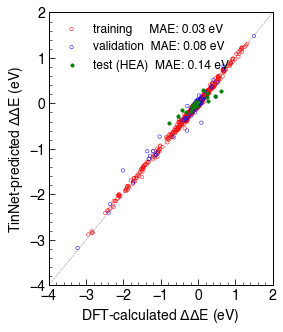

In [3]:
#TinNet parity plots

symbols = ['s','o','^','v','<','>','+','x','D','d'] # Symbol
lps = [k+'-' for k in ['o','^','v','<','>','s','+','x','D','d']] # Line + Symbol
colors= ['b','r','g','c','m','y','k','w'] # Color
ms = 4
ew = 1.5
rcParams['figure.figsize'] = 1.6*1.5*1.67323,2.0*1.5*1.67323
rcParams['ps.useafm'] = True
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
mpl.rcParams['axes.linewidth'] = 1

rcParams['pdf.fonttype'] = 42
matplotlib.rc('xtick.major', size=6)
matplotlib.rc('xtick.minor', size=3)
matplotlib.rc('ytick.major', size=6)
matplotlib.rc('ytick.minor', size=3)
matplotlib.rc('lines', markeredgewidth=0.5*2)
matplotlib.rc('font', size=7*2.0)

fig, ax = plt.subplots()


X = DFT_train
y = TinNet_train

ax.scatter(X,
           y,
           marker = 'o',
           edgecolor = 'red',
           facecolors='None',
           linewidth = 0.5,
           label = 'training     MAE: '+str(round(mean(abs(np.array(X)-np.array(y))),2))+' eV',
           s = 12,
           alpha = 1)


XX = DFT_val
yy = TinNet_val

ax.scatter(XX,
           yy,
           marker = 'o',
           edgecolor = 'blue',
           facecolors='None',
           linewidth = 0.5,
           label = 'validation  MAE: '+str(round(mean(abs(np.array(XX)-np.array(yy))),2))+' eV',
           s = 12,
           alpha = 1)


XXX = DFT_test
yyy = TinNet_test

ax.scatter(XXX,
           yyy,
           marker = 'o',
           edgecolor = 'green',
           facecolors='green',
           linewidth = 0.5,
           label = 'test (HEA)  MAE: '+str(round(mean(abs(np.array(XXX)-np.array(yyy))),2))+' eV',
           s = 12,
           alpha = 1)


plt.plot([-4,2], [-4,2], color='gray', linestyle='--', linewidth=0.5)

plt.legend(frameon=False,loc='upper left',prop={'size': 12})

ax.set_xlabel(r'DFT-calculated $\Delta\Delta$E (eV)')
ax.set_ylabel(r'TinNet-predicted $\Delta\Delta$E (eV)')

plt.xlim([-4,2])
plt.ylim([-4,2])

plt.minorticks_on()
plt.tick_params(axis="y",direction="in",which='both')
plt.tick_params(axis="x",direction="in",which='both')

plt.xticks([-4,-3,-2,-1,0,1,2])
plt.yticks([-4,-3,-2,-1,0,1,2])


#fig.savefig('tinnet_parity.pdf', bbox_inches='tight',dpi=300)

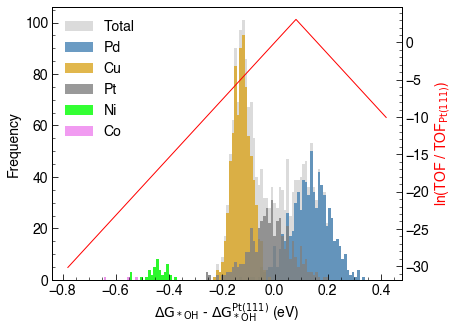

In [4]:
#Activity map

Eads_OH_Pt = 0.78

Eads_OH = np.array(pd.read_csv("HEA_3x3_2000_TinNet.csv")['avg']) - (-2.103)

atoms = Trajectory('HEA_3x3_2000.traj')

Pd_Eads = [Eads_OH[i] + 0.196169251 for i in range(len(atoms)) if atoms[i][31].symbol == 'Pd'] 
Cu_Eads = [Eads_OH[i] + 0.245393521 for i in range(len(atoms)) if atoms[i][31].symbol == 'Cu'] 
Pt_Eads = [Eads_OH[i] + 0.066902284 for i in range(len(atoms)) if atoms[i][31].symbol == 'Pt'] 
Ni_Eads = [Eads_OH[i] + 0.027749114 for i in range(len(atoms)) if atoms[i][31].symbol == 'Ni'] 
Co_Eads = [Eads_OH[i] - 0.03655449 for i in range(len(atoms)) if atoms[i][31].symbol == 'Co'] 

totrate_list = []
for Eads_OH_ in list(np.linspace(0,1.2,1000)):
    Eads_OH_ = np.array([Eads_OH_]*2000)
    eU = 0.78
    GO2 = 4.92
    totrate = 0
    for i in range(len(Eads_OH_)):
        GOH = Eads_OH_[i] 
        GOOH = GOH + 3.2
        GO = 2*GOH
        dG1 = GOOH - GO2 + eU
        dG2 = GO - GOOH + eU
        dG3 = GOH - GO + eU
        dG4 = -GOH + eU
        dG = np.max([dG1,dG2,dG3,dG4])
        totrate += math.exp(-dG/(8.62E-05*300))
    totrate_list.append(totrate)


symbols = ['s','o','^','v','<','>','+','x','D','d'] # Symbol
lps = [k+'-' for k in ['o','^','v','<','>','s','+','x','D','d']] # Line + Symbol
colors= ['b','r','g','c','m','y','k','w'] # Color
ms = 4
ew = 1.5
rcParams['figure.figsize'] = 2.5*1.5*1.67323,2.0*1.5*1.67323
rcParams['ps.useafm'] = True
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rcParams['pdf.fonttype'] = 42
matplotlib.rc('xtick.major', size=6)
matplotlib.rc('xtick.minor', size=3)
matplotlib.rc('ytick.major', size=6)
matplotlib.rc('ytick.minor', size=3)
matplotlib.rc('lines', markeredgewidth=0.5*2)
matplotlib.rc('font', size=7*2.0)

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax2.plot(np.linspace(0,1.2,1000) - Eads_OH_Pt, log(np.array(totrate_list)/2000),color='red',linewidth = 1)

all_data = np.concatenate([Pd_Eads, Cu_Eads, Pt_Eads, Ni_Eads, Co_Eads])
global_min = np.min(all_data)
global_max = np.max(all_data)

num_bins = 100
bin_edges = np.linspace(global_min, global_max, num_bins + 1)

ax1.hist(Pd_Eads+Cu_Eads+Pt_Eads+Ni_Eads+Co_Eads,bins=bin_edges,label = 'Total',alpha = 0.8,color='lightgray')

ax1.hist(Pd_Eads, bins=bin_edges, label='Pd', alpha=0.8, color='steelblue')
ax1.hist(Cu_Eads, bins=bin_edges, label='Cu', alpha=0.8, color='goldenrod')
ax1.hist(Pt_Eads, bins=bin_edges, label='Pt', alpha=0.8, color='gray')
ax1.hist(Ni_Eads, bins=bin_edges, label='Ni', alpha=0.8, color='lime')
ax1.hist(Co_Eads, bins=bin_edges, label='Co', alpha=0.8, color='violet')


ax1.minorticks_on()
ax2.minorticks_on()

ax1.tick_params(axis="x",direction="in",which='both')
ax1.tick_params(axis="y",direction="in",which='both')

ax2.tick_params(axis="x",direction="in",which='both')
ax2.tick_params(axis="y",direction="in",which='both')

ax1.set_xlabel(r'$\Delta \rm G_{\rm *OH}$ - $\Delta \rm G_{\rm *OH}^{\rm Pt(111)}$ (eV)')
ax1.set_ylabel('Frequency')
ax2.set_ylabel(r'ln(TOF / TOF$_{\rm Pt(111)}$)',color = 'red')
ax1.legend(loc='upper left',frameon=False)
#plt.savefig('Activity_map.pdf', format='pdf',transparent = True,dpi=600)

Text(0.5, 0, 'Lattice constant $\\AA$')

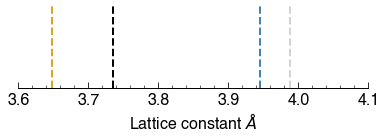

In [5]:
#Lattice constant distribution

symbols = ['s','o','^','v','<','>','+','x','D','d'] # Symbol
lps = [k+'-' for k in ['o','^','v','<','>','s','+','x','D','d']] # Line + Symbol
colors= ['b','r','g','c','m','y','k','w'] # Color
ms = 4
ew = 1.5
rcParams['figure.figsize'] = 2.5*1.5*1.67323,0.6*1.5*1.67323
rcParams['ps.useafm'] = True
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rcParams['pdf.fonttype'] = 42
matplotlib.rc('xtick.major', size=6)
matplotlib.rc('xtick.minor', size=3)
matplotlib.rc('ytick.major', size=6)
matplotlib.rc('ytick.minor', size=3)
matplotlib.rc('lines', markeredgewidth=0.5*2)
matplotlib.rc('font', size=8*2.0)

fig, ax1 = plt.subplots()

reference_data = {'Co': {'d_cen': -1.5905, 'rd': 0.5605605605605606, 'dij': 2.45, 'Wd': 6.696932181}, 
                  'Ni': {'d_cen': -1.6686, 'rd': 0.5205205205205206, 'dij': 2.49, 'Wd': 5.354092732}, 
                  'Cu': {'d_cen': -2.6521, 'rd': 0.4904904904904905, 'dij': 2.58, 'Wd': 4.244656352}, 
                  'Pd': {'d_cen': -2.087, 'rd': 0.6706706706706707, 'dij': 2.79, 'Wd': 5.679312123}, 
                  'Pt': {'d_cen': -2.6369, 'rd': 0.7907907907907907, 'dij': 2.82, 'Wd': 7.638177581}}

ax1.set_xlim([3.6,4.1])
ax1.set_ylim([0,9])

ax1.vlines(reference_data['Cu']['dij']*2**0.5,ymin=0,ymax=9,colors='goldenrod',linestyles='--',label = 'Cu',linewidth=2)
ax1.vlines(reference_data['Pd']['dij']*2**0.5,ymin=0,ymax=9,colors='steelblue',linestyles='--',label = 'Pd',linewidth=2)
ax1.vlines(reference_data['Pt']['dij']*2**0.5,ymin=0,ymax=9,colors='lightgray',linestyles='--',label = 'Pt',linewidth=2)

ax1.vlines(3.7351,ymin=0,ymax=9,colors='black',linestyles='--',label = 'HEA',linewidth=2)

ax1.set_yticks([])
ax1.minorticks_on()

ax1.tick_params(axis="x",direction="in",which='both')
ax1.tick_params(axis="y",direction="in",which='both')

ax1.spines['top'].set_visible(False)   
ax1.spines['right'].set_visible(False) 
ax1.spines['left'].set_visible(False)

ax1.set_xlabel(r'Lattice constant $\AA$')
#plt.savefig('lattice_distribution.pdf', format='pdf',transparent = True,dpi=600,bbox_inches='tight')

No handles with labels found to put in legend.


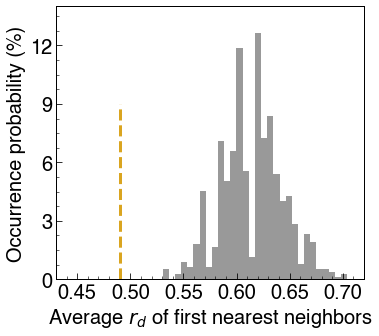

In [6]:
#d-orbital radius (rd) distribution of Cu sites

atoms = Trajectory('all_3x3_images.traj')

nbr_idx_list = [19,20,22,28,29,30,32,33,34]

Cu_rd_list = []
Pd_rd_list = []
Pt_rd_list = []

for i in range(2000):
    atom = atoms[i]
    if atom[31].symbol == 'Cu':
        tot_rd = 0
        for idx in nbr_idx_list:
            tot_rd += reference_data[atom[idx].symbol]['rd']
        avg_rd = tot_rd/9
        Cu_rd_list.append(avg_rd)
        
    elif atom[31].symbol == 'Pd':
        tot_rd = 0
        for idx in nbr_idx_list:
            tot_rd += reference_data[atom[idx].symbol]['rd']
        avg_rd = tot_rd/9
        Pd_rd_list.append(avg_rd)
        
    elif atom[31].symbol == 'Pt':
        tot_rd = 0
        for idx in nbr_idx_list:
            tot_rd += reference_data[atom[idx].symbol]['rd']
        avg_rd = tot_rd/9
        Pt_rd_list.append(avg_rd)

symbols = ['s','o','^','v','<','>','+','x','D','d'] # Symbol
lps = [k+'-' for k in ['o','^','v','<','>','s','+','x','D','d']] # Line + Symbol
colors= ['b','r','g','c','m','y','k','w'] # Color
ms = 4
ew = 1.5
rcParams['figure.figsize'] = 2.2*1.5*1.67323,2.0*1.5*1.67323
rcParams['ps.useafm'] = True
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rcParams['pdf.fonttype'] = 42
matplotlib.rc('xtick.major', size=6)
matplotlib.rc('xtick.minor', size=3)
matplotlib.rc('ytick.major', size=6)
matplotlib.rc('ytick.minor', size=3)
matplotlib.rc('lines', markeredgewidth=0.5*2)
matplotlib.rc('font', size=10*2.0)

fig, ax1 = plt.subplots()

nn = len(Cu_rd_list)/100
ax1.hist(Cu_rd_list,bins=30,alpha = 0.8,color='gray',weights=np.ones_like(Cu_rd_list)/nn)

ax1.set_xlim([0.43,0.72])
ax1.set_ylim([0,14])

ax1.vlines(reference_data['Cu']['rd'],ymin=0,ymax=9,colors='goldenrod',linestyles='--',linewidth=3)

plt.xticks([0.45,0.5,0.55,0.6,0.65,0.7])
ax1.set_yticks([0,3,6,9,12])

ax1.minorticks_on()

ax1.tick_params(axis="x",direction="in",which='both')
ax1.tick_params(axis="y",direction="in",which='both')


ax1.set_xlabel(r'Average $r_d$ of first nearest neighbors')
ax1.set_ylabel('Occurrence probability (%)')
ax1.legend(loc='upper left',frameon=False)
#plt.savefig('Cu_rd.pdf', format='pdf',transparent = True,dpi=600,bbox_inches='tight')

No handles with labels found to put in legend.


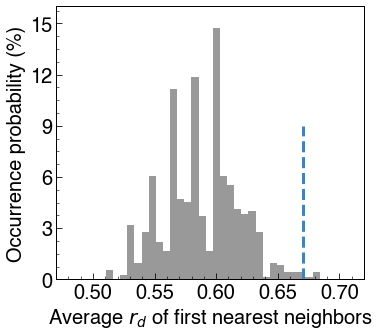

In [7]:
#d-orbital radius (rd) distribution of Pd sites

symbols = ['s','o','^','v','<','>','+','x','D','d'] # Symbol
lps = [k+'-' for k in ['o','^','v','<','>','s','+','x','D','d']] # Line + Symbol
colors= ['b','r','g','c','m','y','k','w'] # Color
ms = 4
ew = 1.5
rcParams['figure.figsize'] = 2.2*1.5*1.67323,2.0*1.5*1.67323
rcParams['ps.useafm'] = True
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rcParams['pdf.fonttype'] = 42
matplotlib.rc('xtick.major', size=6)
matplotlib.rc('xtick.minor', size=3)
matplotlib.rc('ytick.major', size=6)
matplotlib.rc('ytick.minor', size=3)
matplotlib.rc('lines', markeredgewidth=0.5*2)
matplotlib.rc('font', size=10*2.0)

fig, ax1 = plt.subplots()

nn = len(Pd_rd_list)/100
ax1.hist(Pd_rd_list,bins=30,alpha = 0.8,color='gray',weights=np.ones_like(Pd_rd_list)/nn)

ax1.set_xlim([0.47,0.72])
ax1.set_ylim([0,16])

ax1.vlines(reference_data['Pd']['rd'],ymin=0,ymax=9,colors='steelblue',linestyles='--',linewidth=3)

plt.xticks([0.5,0.55,0.6,0.65,0.7])
ax1.set_yticks([0,3,6,9,12,15])

ax1.minorticks_on()

ax1.tick_params(axis="x",direction="in",which='both')
ax1.tick_params(axis="y",direction="in",which='both')


ax1.set_xlabel(r'Average $r_d$ of first nearest neighbors')
ax1.set_ylabel('Occurrence probability (%)')
ax1.legend(loc='upper left',frameon=False)
#plt.savefig('Pd_rd.pdf', format='pdf',transparent = True,dpi=600,bbox_inches='tight')

No handles with labels found to put in legend.


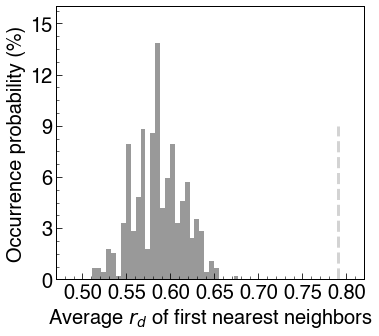

In [8]:
#d-orbital radius (rd) distribution of Pt sites

symbols = ['s','o','^','v','<','>','+','x','D','d'] # Symbol
lps = [k+'-' for k in ['o','^','v','<','>','s','+','x','D','d']] # Line + Symbol
colors= ['b','r','g','c','m','y','k','w'] # Color
ms = 4
ew = 1.5
rcParams['figure.figsize'] = 2.2*1.5*1.67323,2.0*1.5*1.67323
rcParams['ps.useafm'] = True
plt.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

rcParams['pdf.fonttype'] = 42
matplotlib.rc('xtick.major', size=6)
matplotlib.rc('xtick.minor', size=3)
matplotlib.rc('ytick.major', size=6)
matplotlib.rc('ytick.minor', size=3)
matplotlib.rc('lines', markeredgewidth=0.5*2)
matplotlib.rc('font', size=10*2.0)

fig, ax1 = plt.subplots()

nn = len(Pt_rd_list)/100
ax1.hist(Pt_rd_list,bins=30,alpha = 0.8,color='gray',weights=np.ones_like(Pt_rd_list)/nn)

ax1.set_xlim([0.47,0.82])
ax1.set_ylim([0,16])

ax1.vlines(reference_data['Pt']['rd'],ymin=0,ymax=9,colors='lightgray',linestyles='--',linewidth=3)

plt.xticks([0.5,0.55,0.6,0.65,0.7,0.75,0.8])
ax1.set_yticks([0,3,6,9,12,15])

ax1.minorticks_on()

ax1.tick_params(axis="x",direction="in",which='both')
ax1.tick_params(axis="y",direction="in",which='both')


ax1.set_xlabel(r'Average $r_d$ of first nearest neighbors')
ax1.set_ylabel('Occurrence probability (%)')
ax1.legend(loc='upper left',frameon=False)
#plt.savefig('Pt_rd.pdf', format='pdf',transparent = True,dpi=600,bbox_inches='tight')